In [1]:
import torch

In [2]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Function to display images
def show_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get some random training images
dataiter = iter(test_loader)
images, labels = next(dataiter)



# Show images
show_images(images[:10], labels[:10])

NameError: name 'test_loader' is not defined

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [5]:
import app.mnist_cnn as cnn

In [10]:
model = cnn.CNN()
model.load_state_dict(torch.load("mnist_cnn.pt", weights_only=True))
model.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [11]:
import app.data as data

In [12]:
import app.trainer as train

In [13]:
loss_f = train.get_loss_function("cross_entropy")

In [14]:
_,_,test_loader = data.get_dataloaders()

In [15]:
losses = []
model.eval()

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        output = model(x)
        losses.append(loss_f(output, y).item())

mean_loss = sum(losses) / len(losses)


In [16]:
sum(losses)/len(losses)

0.04635748748101599

torch.Size([64, 10])


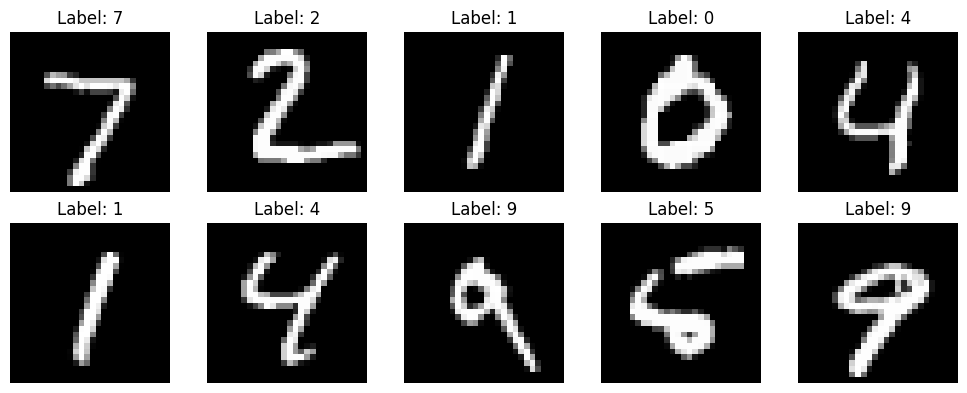

In [28]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

model.eval()
with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)  # predicted class per image

print(outputs.shape)  # (batch_size, 10)

# Show images with predictions
show_images(images[:20], preds[:20])


In [72]:
len(test_loader)

157

In [10]:
import app.trainer as trainer

In [11]:
optimizer = trainer.get_optimizer("sgd", model, 0.001)
loss_fn = trainer.get_loss_function("cross_entropy")

In [12]:
losses = []

for i in range(20):
    loss = trainer.train_one_epoch(model, train_loader, optimizer, loss_fn)
    if i % 2 == 0:
        print(loss)

1.9138111780955593
0.40234535055628207
0.29020818115583363
0.23905755185893476
0.2021788326161566
0.17338140687740433
0.15051468322351416
0.13234924087956199
0.11852188756677515
0.1071349586080164
